# **Analyzing Netfilx Movies**

## **Importing Libraries and Reading Data**

In [2]:
#Importing libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#loading Data:
df=pd.read_csv('netflix_titles.csv')

## **Exploring Data:**

In [4]:
df.shape

(8807, 12)

In [5]:
#exploring Data:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [9]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

## **Data cleaning:**


In [11]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Handeling missing data in rating column:

In [12]:
df.rating.value_counts(dropna=False)

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NaN            4
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [13]:
df['rating'].fillna('TV-MA', inplace=True)

In [14]:
df.rating.isna().sum()

0

### Handeling missing data in Director column:

In [15]:
df['director'].value_counts(dropna=False)

director
NaN                               2634
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: count, Length: 4529, dtype: int64

In [16]:
#NaN has the Maximum value in this column --> changig to Unknown
df['director'].fillna('Unknown',inplace=True)

In [17]:
df['director'].value_counts(dropna=False)

director
Unknown                           2634
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: count, Length: 4529, dtype: int64

### Handeling missing data in cast column:

In [18]:
df['cast'].value_counts

<bound method IndexOpsMixin.value_counts of 0                                                     NaN
1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                                     NaN
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
                              ...                        
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8803                                                  NaN
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 8807, dtype: object>

In [19]:
df['cast'].fillna('unknown',inplace=True)

### Handeling missing data in cast Country:

In [20]:
df['country'].value_counts(dropna=False)

country
United States                             2818
India                                      972
NaN                                        831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64

In [21]:
CountryMode=df['country'].mode()
df['country'].fillna(CountryMode[0],inplace=True)


### Dropping data in duration and date added columns:

In [22]:
df.dropna(subset=['date_added','duration'],inplace=True)

In [23]:
#Make sure there is no Nan value in data frame:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## **Check for Duplicate Data:**

In [24]:
df.duplicated().sum()

0

## **Checking For Data Types**

In [25]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

### Changing date_added column to date:

In [26]:
df['date_added']=pd.to_datetime(df['date_added'],format='mixed')
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

### Get Month and Year for further analyze

In [27]:
df['month']=pd.to_numeric(df['date_added'].dt.month,errors='coerce').astype('Int64')
df['Year']=pd.to_numeric(df['date_added'].dt.year,errors='coerce').astype('Int64')
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
month                    Int64
Year                     Int64
dtype: object

## **Naming Columns with Proper Name**

In [28]:
df=df.rename(columns={'listed_in':'Genre'})
# or we could Write : df.rename(columns={'Listed_in':'Genre'},inplace=True)
# or df.columns=df.columns.str.replace('listed_in','Genre')


In [29]:
df.Genre=df.Genre.apply(lambda x:x.split(',')[0]) #Reduced and changed Genre to one value by using split and [0]


## **Saving Changes:**

In [30]:
df.to_csv('After Cleaning.csv',mode='w')

## **Analyzing Data**:

### **Comparison Between Production Types in 2014-2021:**

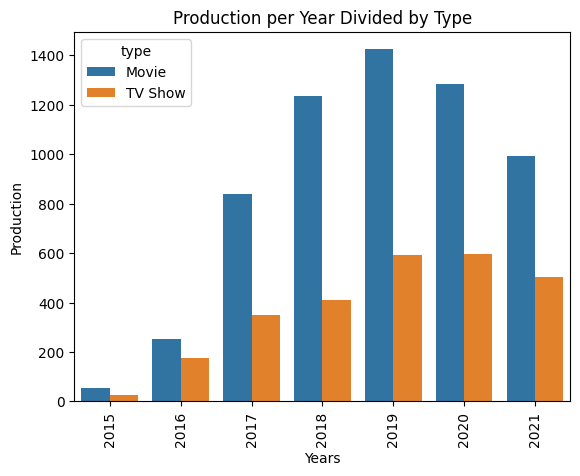

In [31]:
data=df[df['Year']>2014]
plt.Figure(figsize=(5,5))
plt.title(label='Production per Year Divided by Type')
sns.countplot(data=data,x='Year',hue='type')
plt.xlabel('Years')
plt.ylabel('Production')
plt.xticks(rotation=90)
plt.show()

### **Most released Production per Year(2015-2021)**

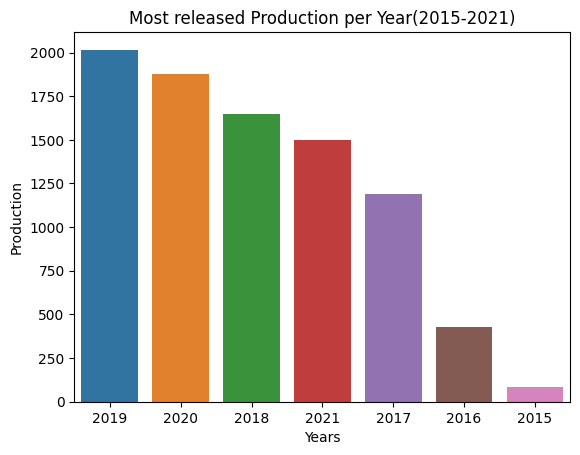

In [32]:
#Most Priduction from 2015 to 2021
plt.Figure(figsize=(5,5))
plt.title(label='Most released Production per Year(2015-2021)')
sns.countplot(data=data,x='Year',order=df['Year'].value_counts().index[:7])
plt.xlabel('Years')
plt.ylabel('Production')
plt.show()

### **Proportion Between  Type** (2008-2021)

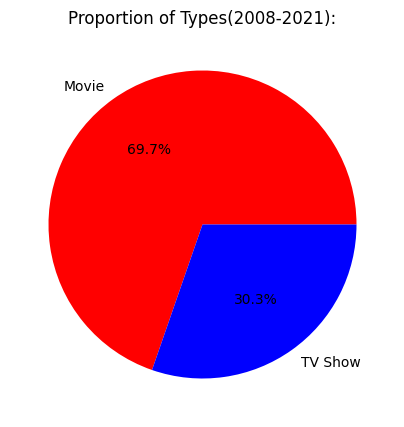

In [33]:
data=df['type'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(data=data,x=data.values,labels=data.index,autopct='%1.1f%%',colors=['red','blue'])
plt.title('Proportion of Types(2008-2021):')
plt.show()

### **Top 10 Productive Countries(2008-2021)**

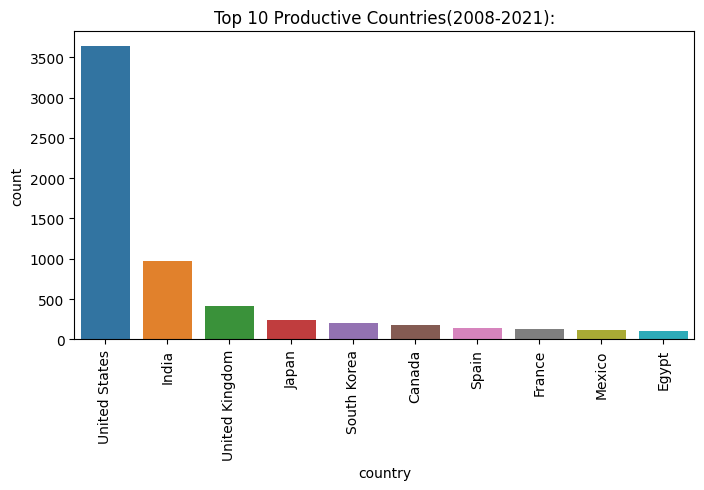

In [34]:
plt.figure(figsize=(8,4))
sns.countplot(data=df,x='country',order=df['country'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title(label='Top 10 Productive Countries(2008-2021):')
plt.show()

### **Production based on Rating(2008-2021):**

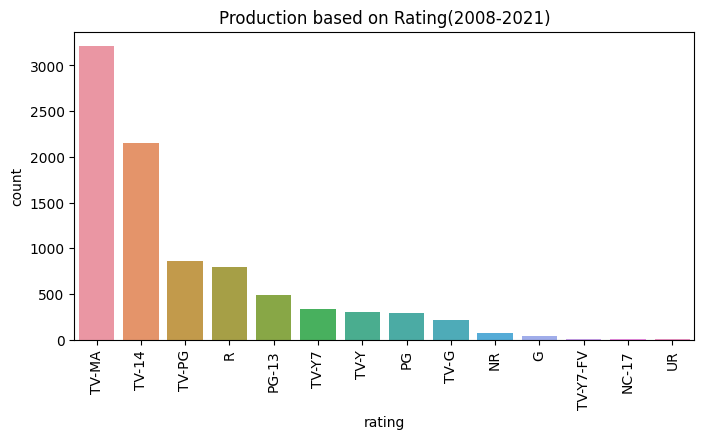

In [35]:

plt.figure(figsize=(8,4))
sns.countplot(data=df,x=df['rating'],order=df['rating'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Production based on Rating(2008-2021)')
plt.show()

### **Top 10 Genres (2008-2021)**

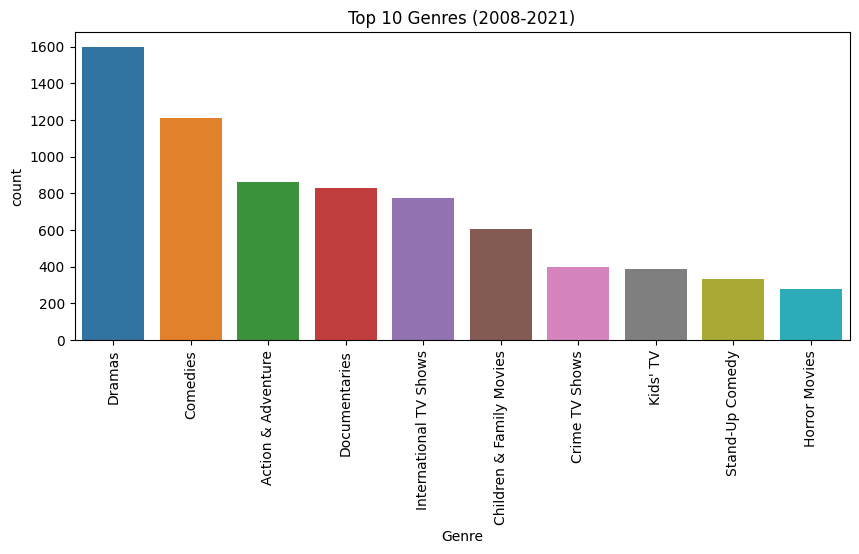

In [36]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x=df['Genre'],order=df['Genre'].value_counts().index[:10])
plt.title('Top 10 Genres (2008-2021)')
plt.xticks(rotation=90)
plt.show()

### **Top 10 Directors:**

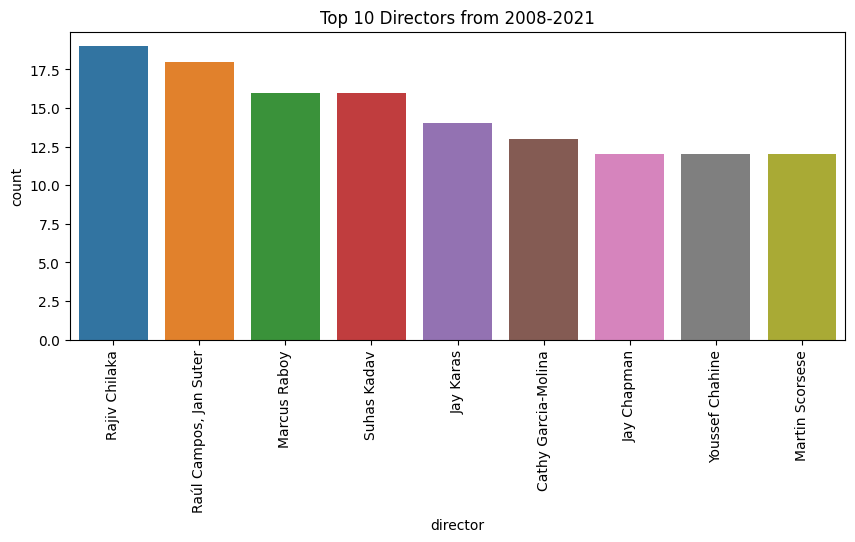

In [37]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x=df['director'],order=df['director'].value_counts().index[1:10])#as unknown has the most number we remove it
plt.xticks(rotation=90)
plt.title('Top 10 Directors from 2008-2021')
plt.show()

### **Content Distribution over the Year:**

C:\Users\milad\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x400 with 0 Axes>

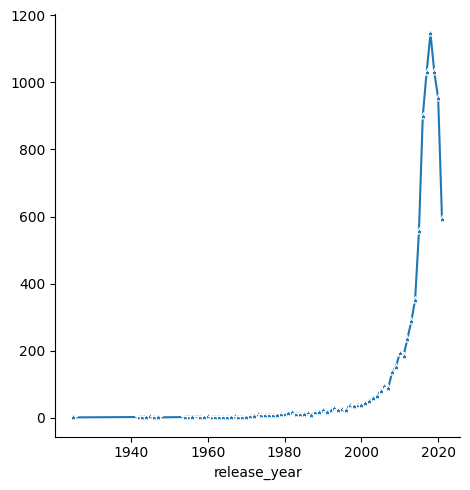

In [38]:
plt.figure(figsize=(10,4))
sns.relplot(x=df['release_year'].value_counts().index,y=df['release_year'].value_counts().values,kind='line',marker='*')
plt.show()

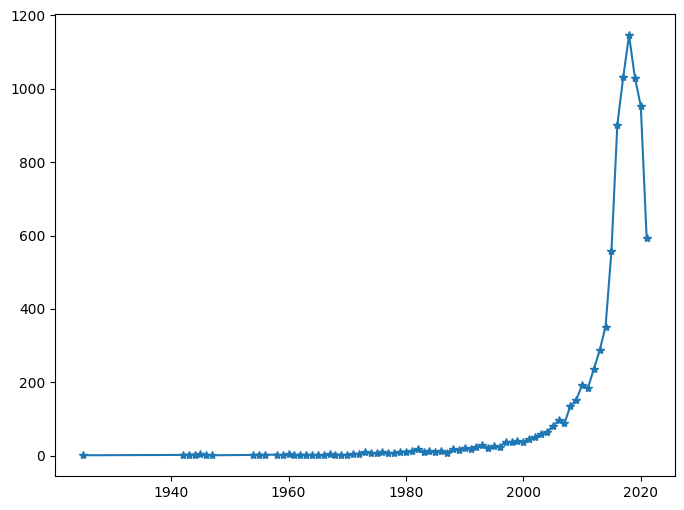

In [42]:
#same result with plot chart
plt.figure(figsize=(8,6))
plt.plot(df['release_year'].value_counts().sort_index().index,df['release_year'].value_counts().sort_index().values,marker='*')
plt.show()